In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dfmerged.csv')
df.drop('Unnamed: 0', axis = 1, inplace= True)

In [4]:
products = pd.read_csv('products.csv')
products.describe()


,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [5]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,soft drinks,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,soft drinks,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,soft drinks,beverages


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  department              object 
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,33819106.0,1.710566e+06,987400.761933,1.0,855413.0,1710660.0,2565587.0,3421083.0
user_id,33819106.0,1.029444e+05,59467.333955,1.0,51435.0,102626.0,154412.0,206209.0
order_number,33819106.0,1.713998e+01,17.498287,1.0,5.0,11.0,24.0,100.0
order_dow,33819106.0,2.737285e+00,2.093296,0.0,1.0,3.0,5.0,6.0
order_hour_of_day,33819106.0,1.343123e+01,4.246149,0.0,10.0,13.0,16.0,23.0
days_since_prior_order,31741038.0,1.136415e+01,8.940500,0.0,5.0,8.0,15.0,30.0
product_id,33819106.0,2.557551e+04,14097.696774,1.0,13519.0,25256.0,37935.0,49688.0
add_to_cart_order,33819106.0,8.367738e+00,7.139540,1.0,3.0,6.0,11.0,145.0
reordered,33819106.0,5.900617e-01,0.491822,0.0,0.0,1.0,1.0,1.0
aisle_id,33819106.0,7.121799e+01,38.198982,1.0,31.0,83.0,107.0,134.0


## Main Insights From DataFrame Overview  

**The merged data frame of all the orders includes:**
* Order numbers ranging from 1 to 100
* Days between orders range from 5 to 30
* Number of items in order max out at 145 
* There are 134 aisles and 21 departments 
* Total of 33,819,106 entries and 15 columns 
* On average 59% of orders are reorders

## Objective 

Since we are aiming to predict the probability of a customer ordering a particular product in future orders there are a few variables that are of concern here. 

* <b>User</b> describe user characteristics, their ordering pattern, what percent of their orders are reorders
* <b>Product</b> describe the characteristics of a product, it's reorder percentage, total number of orders, department
* <b>User and Product</b> describe a user's behavior towards particular products, which products do they reorder the most, out of all their orders how often is a product ordered

These variables will be used as the predictors to determine the contents of future baskets. Before we dive into these variables, I will first explore the data to get a sense of how columns are distributed and the relationships between them. 


## 1.1.1 : Product Distribution By Type 

I will begin the EDA process by getting an understanding of the products available and how the distribution of their orders by the classifiers given (i.e. deparment and aisle). 

First it will be interesting to see the distribution of products by department to get an idea of what types of products people order most often. 


In [10]:
product_info = df.groupby('product_id')['reordered'].sum().to_frame('p_total_reorders')
purchases = df.groupby('product_id')['order_id'].count().to_frame('p_total_purchases')
product_info = product_info.merge(purchases, on = 'product_id', how= 'left').fillna(0)
product_info['percent_reorder'] = product_info['p_total_reorders']/product_info['p_total_purchases']
product_info = product_info.merge(products, on='product_id', how='inner')
product_info.sort_values(by = 'product_id', inplace=True)
departments = pd.read_csv('datasets_4931_7487_departments.csv')
product_info = product_info.merge(departments, on='department_id', how='inner')
product_info = product_info.sort_values(by=['p_total_purchases', 'percent_reorder'], ascending = False)
product_info.head()

,product_id,p_total_reorders,p_total_purchases,percent_reorder,product_name,aisle_id,department_id,department
41996,24852,415166,491291,0.845051,Banana,24,4,produce
41612,13176,329275,394930,0.833755,Bag of Organic Bananas,24,4,produce
41881,21137,214448,275577,0.778178,Organic Strawberries,24,4,produce
41910,21903,194939,251705,0.774474,Organic Baby Spinach,123,4,produce
42723,47209,176173,220877,0.797607,Organic Hass Avocado,24,4,produce


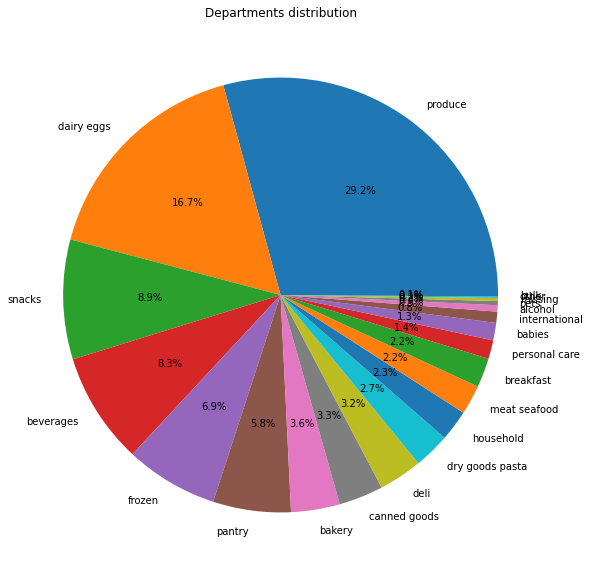

In [8]:
plt.figure(figsize =(10,10))
departments = df['department'].value_counts()
labels = (np.array(departments.index))
sizes = np.array(departments.values)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Departments distribution')
plt.show()

**Interesting Notes**

Produce is a strong leading department with almost 30% of all orders. This is not surprising since produce has a short shelf life and is therefore ordered most frequently by customers. Now it will be interesting to see which departments have the highest reorder ratio. 

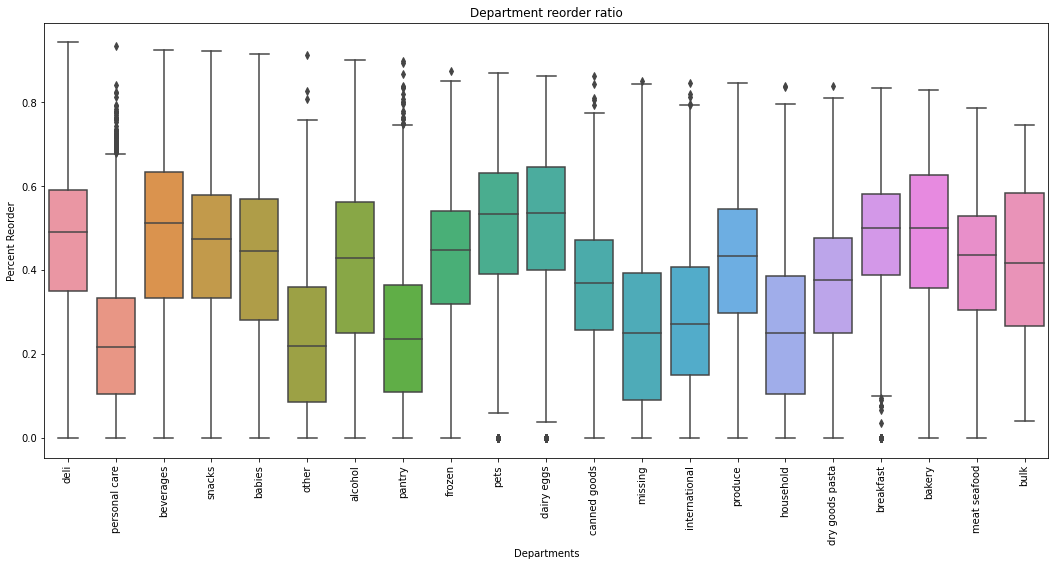

In [21]:
department_reorder = df.groupby(['department', 'product_id'])['reordered'].mean().reset_index()
department_reorder = department_reorder.sort_values(by='reordered', ascending = False)
plt.figure(figsize = (18,8))
sns.boxplot('department' ,'reordered', data = department_reorder)
plt.xlabel('Departments')
plt.ylabel('Percent Reorder')
plt.title('Department reorder ratio')
plt.xticks(rotation ='vertical')
plt.show()

**Interesting Notes of Products by Department**

Looking at the departments by their reorder ratio, we can get a sense of which departments have the items that are most likely to be reordered. We can see that:
* Dairy/Eggs, Pets, Bakery, Beverages, Deli, and Breakfast have some of the highest reorder ratio on average 
* Personal care and household products have the lowest reorder ratio (this makes sense since I would imagine those products last longer and do not need to be ordered as often as products with low shelf life and consumed quickly) 
* Produce did not have a high reorder ratio relative to its very high orders overall
* Pets is another surprising high reorder ratio since it is not highly ordered overall (conceptually this makes sense since people generally purchase the same dog/cat food for their furry companions)


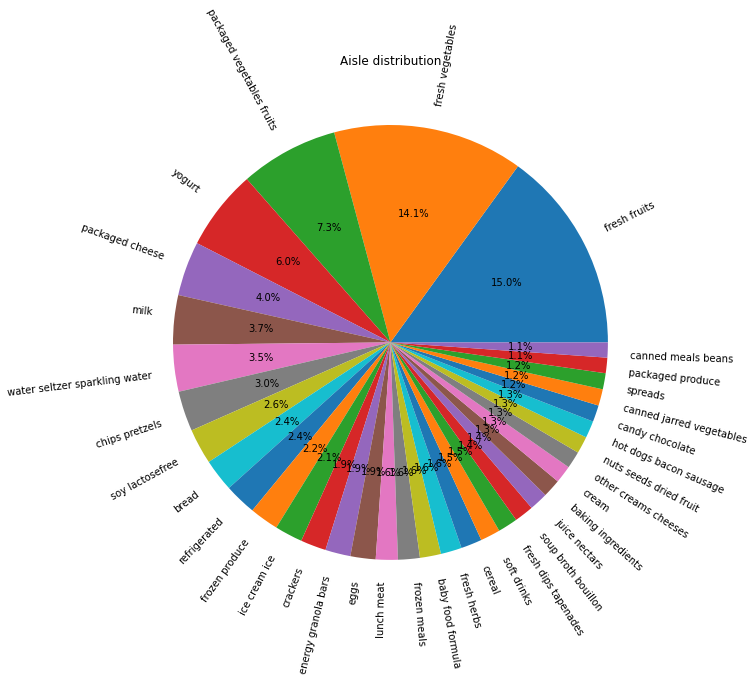

In [12]:

plt.figure(figsize =(10,10))
aisle = df['aisle'].value_counts().head(35)
aisles = (np.array(aisle.index))
counts = np.array(aisle.values)
plt.pie(counts, labels=aisles, autopct='%1.1f%%',rotatelabels=True)
plt.title('Aisle distribution')
plt.show()

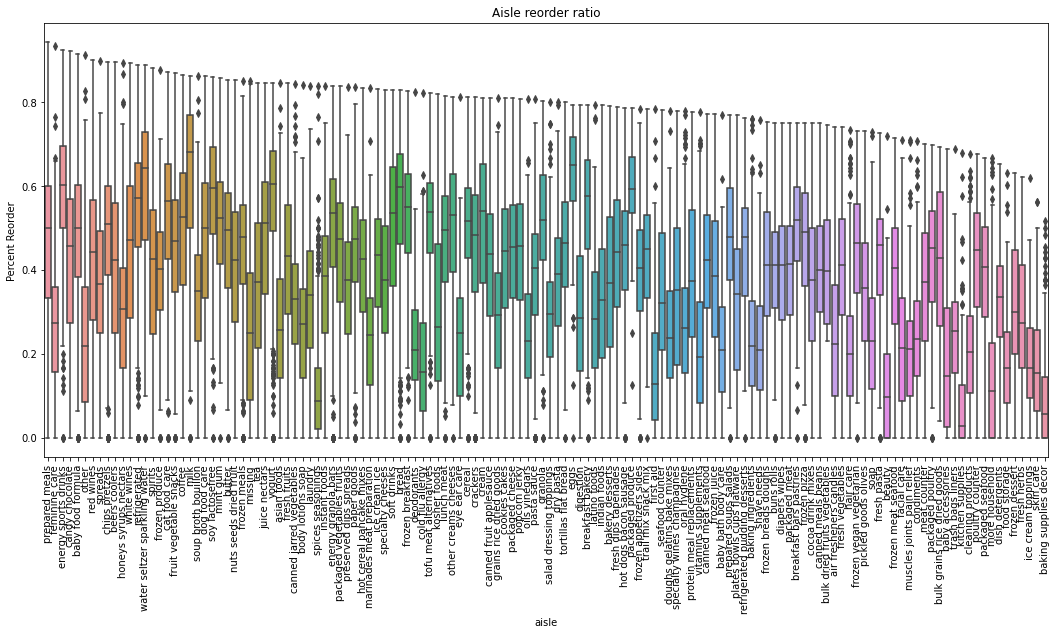

In [19]:
aisle_reorder = df.groupby(['aisle', 'product_id'])['reordered'].mean().reset_index()
aisle_reorder = aisle_reorder.sort_values(by='reordered', ascending = False)
plt.figure(figsize = (18,8))
sns.boxplot('aisle' ,'reordered', data = aisle_reorder)
plt.xlabel('aisle')
plt.ylabel('Percent Reorder')
plt.title('Aisle reorder ratio')
plt.xticks(rotation ='vertical')
plt.show()

**Interesting Notes of Products by Aisle**

It is interesting to note, that the ratio of reorder by Aisle and department do not follow the same distribution as total orders. It would be interesting to explore these relationships further. 

In the figure below, we can see that the total number reorder is positively correlated with total purchases, which makes sense, since if an item is reordered a lot then it is also purchased a lot. 

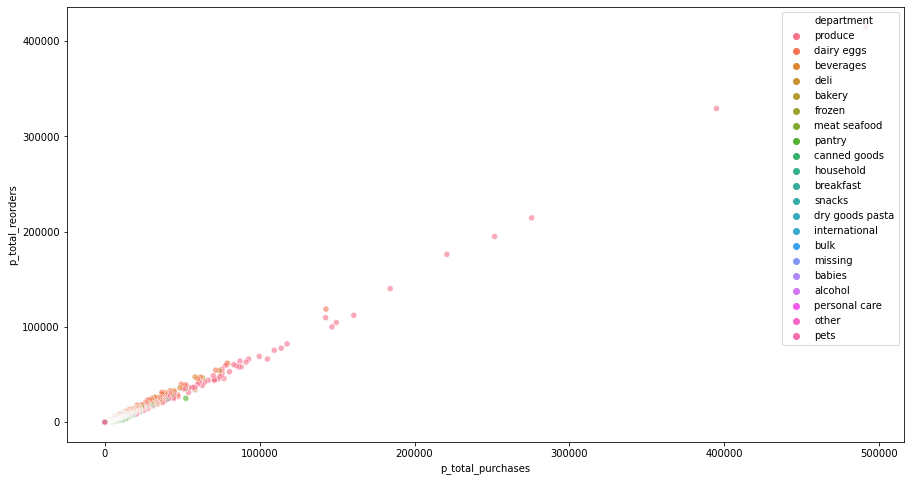

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot('p_total_purchases', 'p_total_reorders', data =product_info, hue = 'department', alpha = .6)
plt.xlabel('p_total_purchases')
plt.ylabel('p_total_reorders')
plt.legend(loc ='upper right')
plt.show()

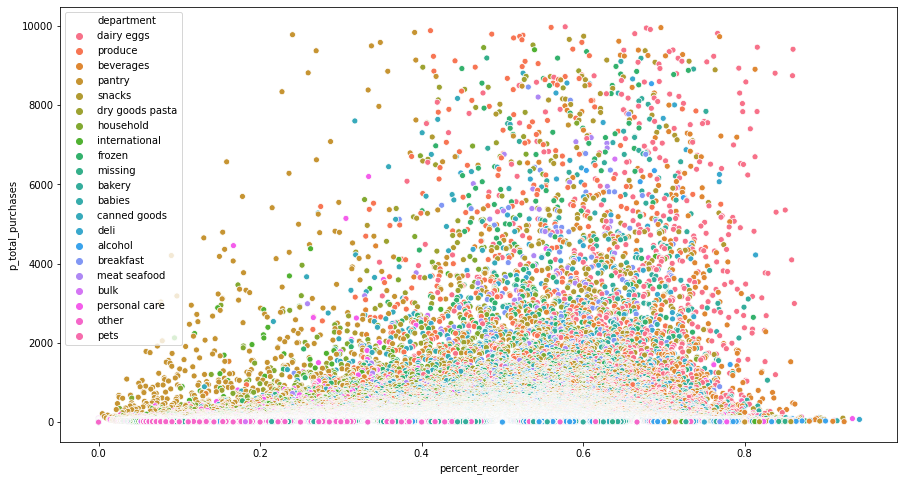

In [35]:
product_info_mod = product_info.loc[product_info['p_total_purchases']< 10000]
plt.figure(figsize=(15,8))
sns.scatterplot( 'percent_reorder','p_total_purchases', data =product_info_mod, hue = 'department')
plt.xlabel('percent_reorder')
plt.ylabel('p_total_purchases')
plt.legend(loc ='upper left')
plt.show()

**Interesting Notes**

There does not seem to be a correlation between reorder ratio and total purchases. Items with low total purchases can still have a high reorder ratio. This makes sense from the previous tables where we explored the reorder ratio and the total number of purchases by department and aisle. The number of total purchases did not necessarily reflect a high average reorder ratio by department or aisle. 


## 1.1.2 Product Reorder Distribution By Time 

Here I would like to explore the relationship of time between purchases and the reorder ratio to see if the time between orders changes the likelihood of a reorder. 

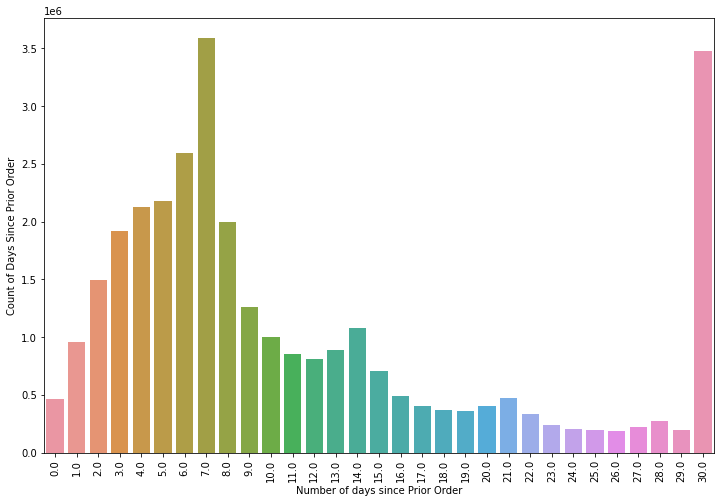

In [23]:
plt.figure(figsize = (12, 8) )
sns.countplot(x = 'days_since_prior_order', data = df)
plt.xlabel('Number of days since Prior Order')
plt.ylabel('Count of Days Since Prior Order')
plt.xticks(rotation = 'vertical')
plt.show()

**Interesting Notes**

Looks like the majority of customers order on a monthly basis, every 30 days or on a weekly 7 day pattern. It is surprising to see how many orders are happening within a week of the last order. After seeing this frequency distribution it would be interesting to see the average ratio of reorders by day since prior order. 

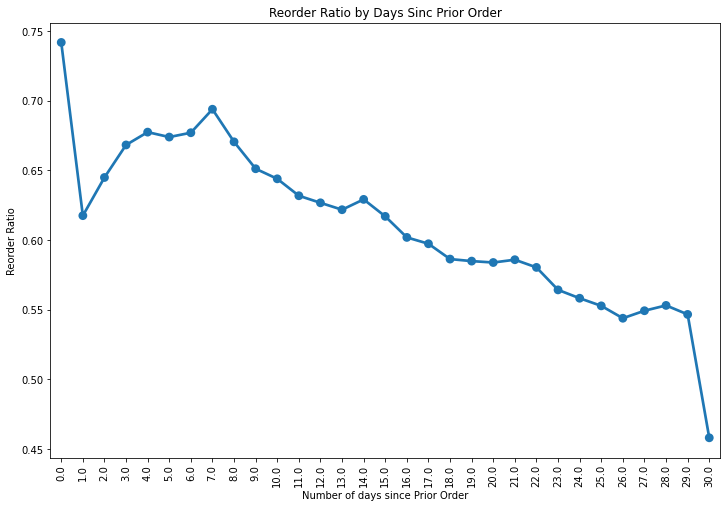

In [24]:
plt.figure(figsize = (12, 8) )
days_reorder = df.groupby('days_since_prior_order')['reordered'].mean().reset_index()
sns.pointplot('days_since_prior_order','reordered', data = days_reorder )
plt.xlabel('Number of days since Prior Order')
plt.ylabel('Reorder Ratio')
plt.title('Reorder Ratio by Days Sinc Prior Order')
plt.xticks(rotation = 'vertical')
plt.show()


**Interesting Notes**

This is interesting to see that the ratio of reordered products in baskets steadily decreases the longer it is between the last order. It does make sense, however, since if a product is reordered often it must be the case that it is reordered sooner than items that have a low reorder percentage. 

There is also a small spike at 7 days which also makes sense since items that people need on a weekly basis are generally reorders. 

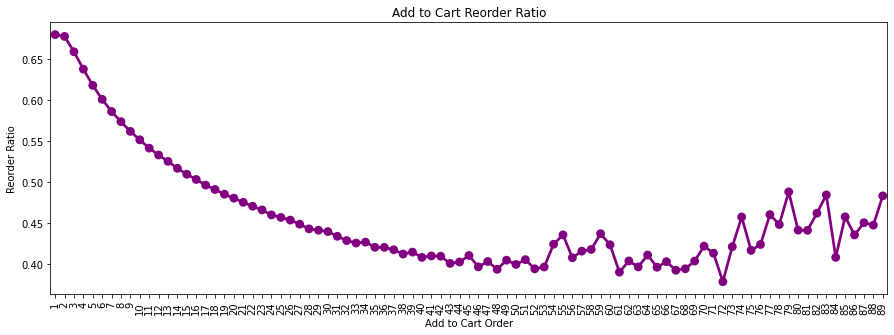

In [37]:
add_to_cart_reorder = df.groupby('add_to_cart_order')['reordered'].aggregate('mean').reset_index()
add_to_cart_reorder = add_to_cart_reorder.loc[add_to_cart_reorder['add_to_cart_order'] < 90]
plt.figure(figsize=(15,5))
sns.pointplot(add_to_cart_reorder['add_to_cart_order'].values, add_to_cart_reorder['reordered'].values, color = 'purple', alpha =.4)
plt.xlabel('Add to Cart Order')
plt.ylabel('Reorder Ratio')
plt.title('Add to Cart Reorder Ratio')
plt.xticks(rotation ='vertical')
plt.show()


**Interesting Notes**

The reorder ratio steadily decreases as more items get added to the cart. This makes sense since people are most likely to order the items they need most often first. It is good to note that the likelihood of reorder from past items is highest at the start of a customers order. 

## 1.1.3 Exploring the User Reorder Distribution

Next I will explore the user ordering pattern to see how it can be used as a predictor for future reorders. 

In [41]:
user_reorder = df.groupby('user_id')['reordered'].sum()
user_orders = df.groupby('user_id')['order_number'].max().to_frame('total_orders')
user_products = df.groupby('user_id')['order_id'].count().to_frame('total_products')
user_info  = pd.merge(user_reorder, user_orders, on = 'user_id', how='inner')
user_info = user_info.merge(user_products, on = 'user_id', how = 'inner')
user_info['average_order_size'] = round(user_info['total_products'] / user_info['total_orders'],2)
user_info['average_reorder'] = round(user_info['reordered'] / user_info['total_products'],2)
user_info.reset_index().head()


,user_id,reordered,total_orders,total_products,average_order_size,average_reorder
0,1,51,11,70,6.36,0.73
1,2,105,15,226,15.07,0.46
2,3,55,12,88,7.33,0.62
3,4,1,5,18,3.60,0.06
4,5,18,5,46,9.20,0.39


In [70]:
user_info.describe()

,index,user_id,reordered,total_orders,total_products,average_order_size,average_reorder
count,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000
mean,103104.000000,103105.000000,96.772498,16.226658,164.004025,9.984529,0.444333
std,59527.555167,59527.555167,160.293373,16.662238,206.014923,5.840857,0.206297
min,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,0.000000
25%,51552.000000,51553.000000,13.000000,6.000000,44.000000,5.780000,0.290000
50%,103104.000000,103105.000000,37.000000,10.000000,90.000000,9.000000,0.440000
75%,154656.000000,154657.000000,106.000000,20.000000,196.000000,13.000000,0.600000
max,206208.000000,206209.000000,3275.000000,100.000000,3725.000000,60.500000,0.990000


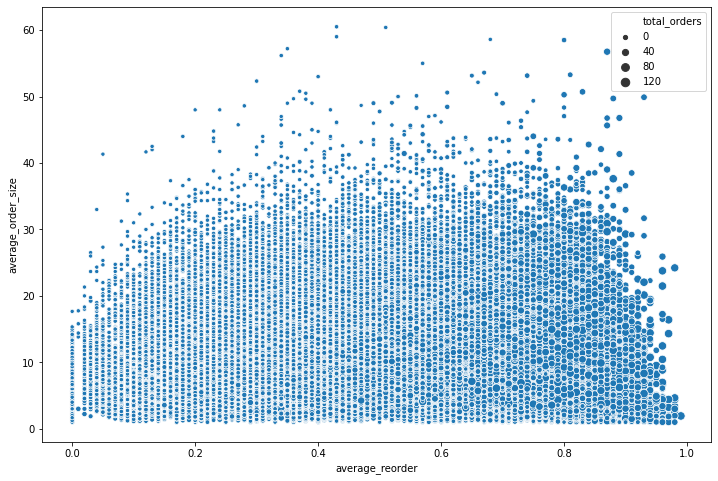

In [69]:

plt.figure(figsize=(12,8))
sns.scatterplot(x = 'average_reorder', y ='average_order_size', size ='total_orders', data = user_info)
plt.title('Average Reorder Vs Average Order Size ')
plt.show()

**Interesting Note**

It is interesting here to note that as the reorder ratio increases, so does the total order number. This shows that the customers who order a lot, also reorder a lot. In the figure below you can see there is a slight positive correlation between average reorder and total orders. 

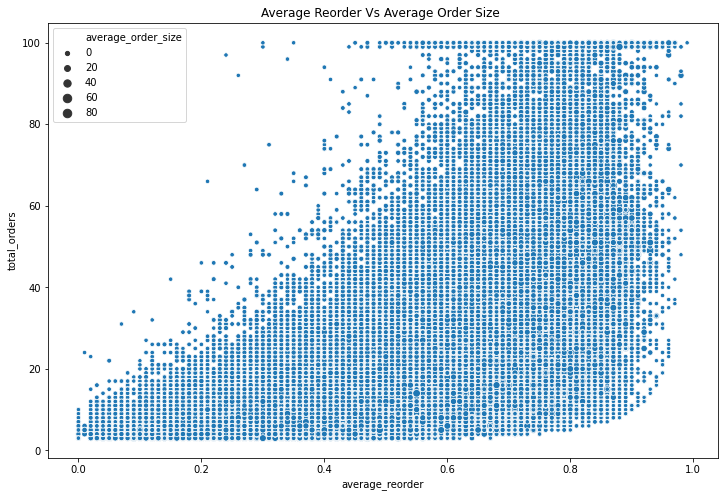

In [71]:

plt.figure(figsize=(12,8))
sns.scatterplot(x = 'average_reorder', y ='total_orders', size ='average_order_size', data = user_info)
plt.title('Average Reorder Vs Average Order Size ')
plt.show()

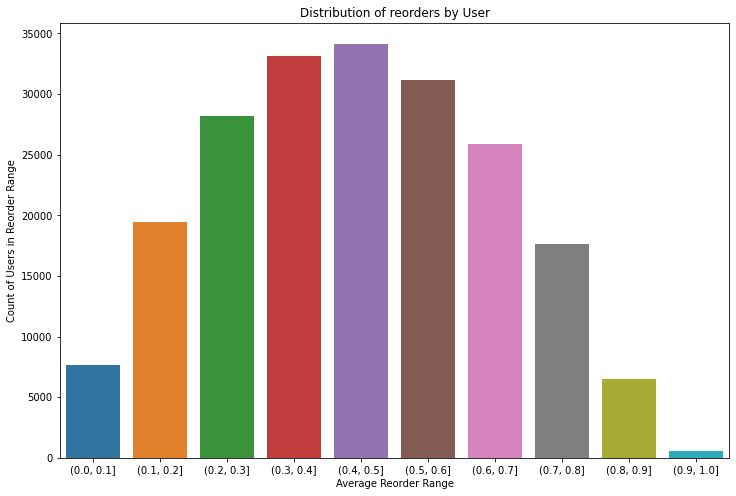

In [55]:
user_info['cut'] = pd.cut(user_info.average_reorder, bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
group = user_info.reset_index()
group = group.groupby('cut')['user_id'].count().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x = 'cut', y ='user_id', data = group)
plt.xlabel("Average Reorder Range")
plt.ylabel('Count of Users in Reorder Range')
plt.title('Distribution of reorders by User')
plt.show()

Here you can see the majority of customers have a reorder ratio between .3 and .6 and it resemble a normal distribution. 

In [62]:
user_info = user_info.reset_index()
user_info.head()

,index,user_id,reordered,total_orders,total_products,average_order_size,average_reorder,cut
0,0,1,51,11,70,6.36,0.73,"(0.7, 0.8]"
1,1,2,105,15,226,15.07,0.46,"(0.4, 0.5]"
2,2,3,55,12,88,7.33,0.62,"(0.6, 0.7]"
3,3,4,1,5,18,3.60,0.06,"(0.0, 0.1]"
4,4,5,18,5,46,9.20,0.39,"(0.3, 0.4]"


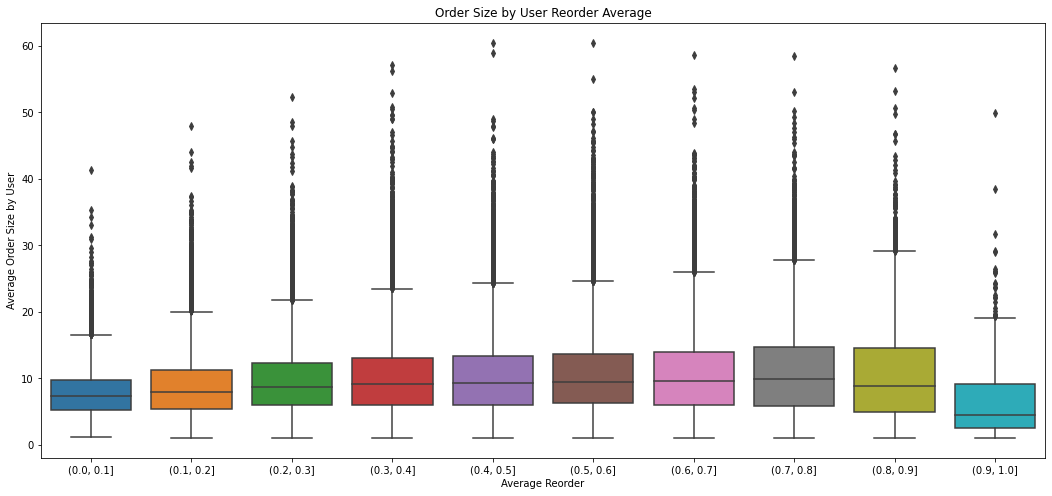

In [65]:
group1 = user_info.groupby(['cut', 'user_id'])['average_order_size']
plt.figure(figsize = (18,8))
sns.boxplot('cut' ,'average_order_size', data = user_info)
plt.xlabel('Average Reorder')
plt.ylabel('Average Order Size by User')
plt.title('Order Size by User Reorder Average')
plt.show()

This is interesting to see that the average order size is increasing until the reorder ratio gets to about .7-.8 and then it decreases a bit. This shows that, for the most part as order size increases so does the reorder ratio by the user. This was not so clear in the previous scatterplots but is clearer here. 

From looking at the user ordering behavior, it seems that the customers that the average number of products in an order is positively correlated with reorder ratio as well as the total number or orders. 

Customers that order more frequently and/or have larger order sizes tend to reorder more frequently as well. 


## 1.2.1 Correlation Heatmap

Below is a Correlation Heatmap of all the variables in all the main dataframe and both the user and product subsets where I calculated more variables.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'order_id'),
  Text(0, 1.5, 'user_id'),
  Text(0, 2.5, 'order_number'),
  Text(0, 3.5, 'order_dow'),
  Text(0, 4.5, 'order_hour_of_day'),
  Text(0, 5.5, 'days_since_prior_order'),
  Text(0, 6.5, 'product_id'),
  Text(0, 7.5, 'add_to_cart_order'),
  Text(0, 8.5, 'reordered'),
  Text(0, 9.5, 'aisle_id'),
  Text(0, 10.5, 'department_id')])

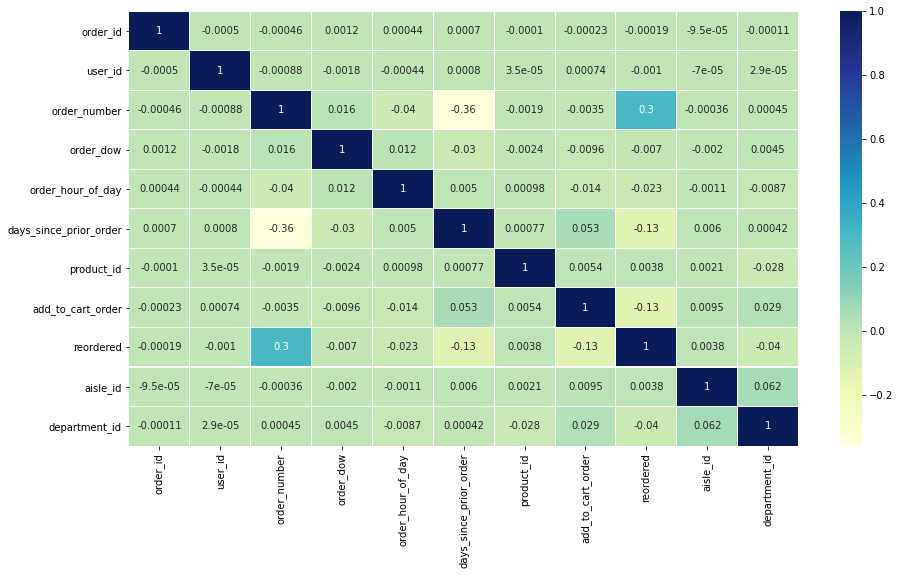

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

In [77]:
user_info.drop('index', axis=1, inplace=True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'user_id'),
  Text(0, 1.5, 'reordered'),
  Text(0, 2.5, 'total_orders'),
  Text(0, 3.5, 'total_products'),
  Text(0, 4.5, 'average_order_size'),
  Text(0, 5.5, 'average_reorder')])

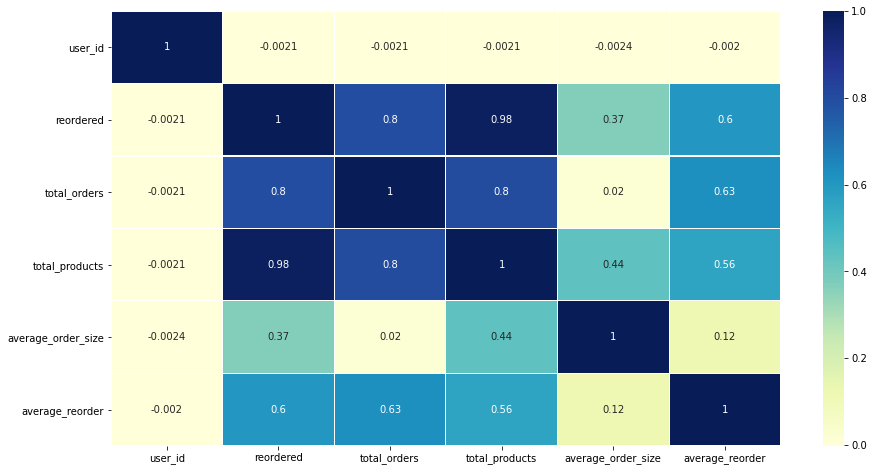

In [78]:
user_info.reset_index()
plt.figure(figsize=(15,8))
sns.heatmap(user_info.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

Here we can see the relationship that we found between average reorder, total orders, and average order size. They are positively correlated.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'product_id'),
  Text(0, 1.5, 'p_total_reorders'),
  Text(0, 2.5, 'p_total_purchases'),
  Text(0, 3.5, 'percent_reorder'),
  Text(0, 4.5, 'aisle_id'),
  Text(0, 5.5, 'department_id')])

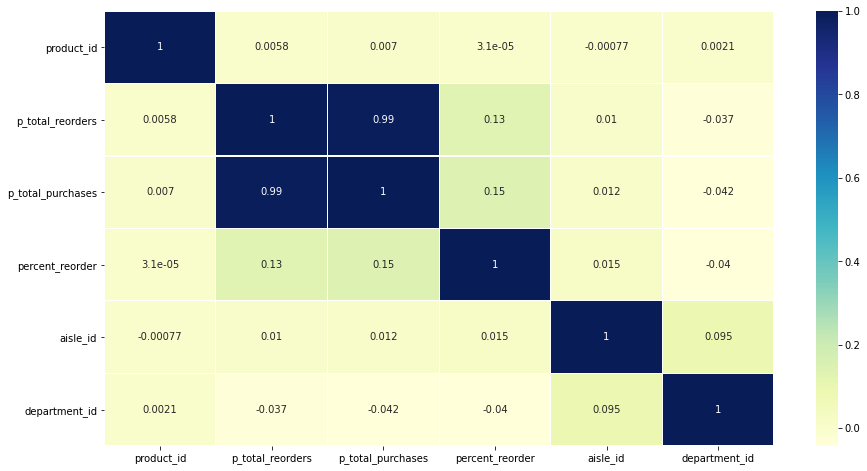

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(product_info.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

We saw the very apparent positive correlation between total purchases and total reorders. Here it is explicitly calculated.

plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), linewidths=.1, cmap = "YlGnBu", annot=True)
plt.yticks(rotation =0